# Web Scrapping With Python

Requests Module

Requests library is used for making HTTP requests to a specific URL and returns the response. Python requests provide inbuilt functionalities for managing both the request and response.

Making a Request

Python requests module has several built-in methods to make HTTP requests to specified URI using GET, POST, PUT, PATCH, or HEAD requests. A HTTP request is meant to either retrieve data from a specified URI or to push data to a server. It works as a request-response protocol between a client and a server. Here we will be using the GET request. 

GET method is used to retrieve information from the given server using a given URI. The GET method sends the encoded user information appended to the page request. 

In [3]:
import requests
req1 = requests.get('https://www.youtube.com/')

print(req1)

print(req1.content)


<Response [200]>
b'<!DOCTYPE html><html style="font-size: 10px;font-family: Roboto, Arial, sans-serif;" lang="en-GB" system-icons typography typography-spacing darker-dark-theme darker-dark-theme-deprecate><head><meta http-equiv="X-UA-Compatible" content="IE=edge"/><meta http-equiv="origin-trial" content="ApvK67ociHgr2egd6c2ZjrfPuRs8BHcvSggogIOPQNH7GJ3cVlyJ1NOq/COCdj0+zxskqHt9HgLLETc8qqD+vwsAAABteyJvcmlnaW4iOiJodHRwczovL3lvdXR1YmUuY29tOjQ0MyIsImZlYXR1cmUiOiJQcml2YWN5U2FuZGJveEFkc0FQSXMiLCJleHBpcnkiOjE2OTUxNjc5OTksImlzU3ViZG9tYWluIjp0cnVlfQ=="/><script nonce="p1IpheZTsgT4qjcHL_UKjg">var ytcfg={d:function(){return window.yt&&yt.config_||ytcfg.data_||(ytcfg.data_={})},get:function(k,o){return k in ytcfg.d()?ytcfg.d()[k]:o},set:function(){var a=arguments;if(a.length>1)ytcfg.d()[a[0]]=a[1];else{var k;for(k in a[0])ytcfg.d()[k]=a[0][k]}}};\nwindow.ytcfg.set(\'EMERGENCY_BASE_URL\', \'\\/error_204?t\\x3djserror\\x26level\\x3dERROR\\x26client.name\\x3d1\\x26client.version\\x3d2.20230615.02.01\'

# Response object
 
When one makes a request to a URI, it returns a response. This Response object in terms of python is returned by requests.method(), method being – get, post, put, etc. Response is a powerful object with lots of functions and attributes that assist in normalizing data or creating ideal portions of code. For example, response.status_code returns the status code from the headers itself, and one can check if the request was processed successfully or not.

Response objects can be used to imply lots of features, methods, and functionalities.

In [4]:
#import module
import requests as rq
#making a get request
req2 = rq.get('https://www.facebook.com/')
#printing  request object
print(req2.url)
#printing the request code
print(req2.status_code)



https://www.facebook.com/
200


# Inspecting Website
 

Before getting out any information from the HTML of the page, we must understand the structure of the page. This is needed to be done in order to select the desired data from the entire page. We can do this by right-clicking on the page we want to scrape and select inspect element.

 


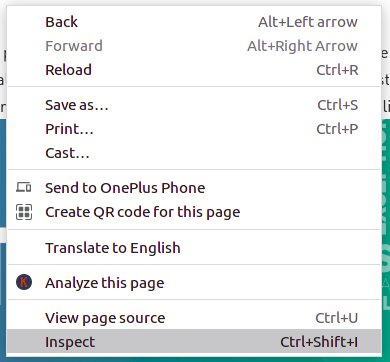

After clicking the inspect button the Developer Tools of the browser gets open. Now almost all the browsers come with the developers tools installed, and we will be using Chrome for this tutorial. 

 


 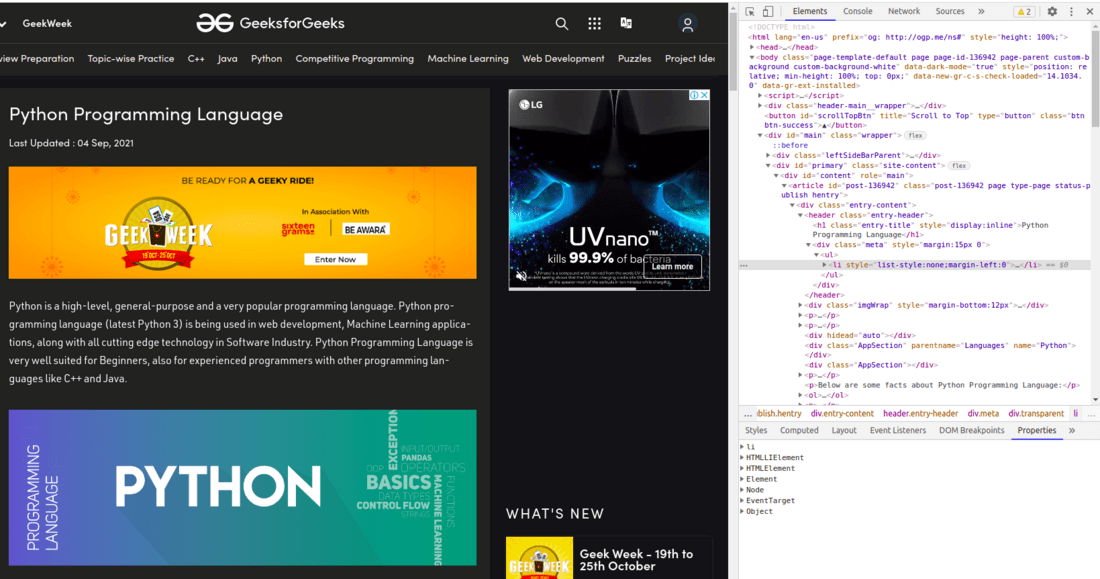

The developer’s tools allow seeing the site’s Document Object Model (DOM). If you don’t know about DOM then don’t worry just consider the text displayed as the HTML structure of the page. 

# Parsing the HTML
 

After getting the HTML of the page let’s see how to parse this raw HTML code into some useful information. First of all, we will create a BeautifulSoup object by specifying the parser we want to use.

 

Note: BeautifulSoup library is built on top of the HTML parsing libraries like html5lib, lxml, html.parser, etc. So BeautifulSoup object and specify the parser library can be created at the same time.

In [5]:
import requests as rq
from bs4 import BeautifulSoup

#making a get reques
req3 = rq.get('https://www.geeksforgeeks.org/')

#printing the response received
print(req3)

#parsing the html
pr_html = BeautifulSoup(req3.content,'html.parser')
print(pr_html.prettify())

<Response [200]>
<!DOCTYPE html>
<html lang="en-us" prefix="og: http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="Data Structures,Algorithms,Python,Java,C,C++,JavaScript,Android Development,SQL,Data Science,Machine Learning,PHP,Web Development,System Design,Tutorial,Technical Blogs,Interview Experience,Interview Preparation,Programming,Competitive Programming,SDE Sheet,Job-a-thon,Coding Contests,GATE CSE,HTML,CSS,React,NodeJS,Placement,Aptitude,Quiz,Computer Science,Programming Examples,GeeksforGeeks Courses,Puzzles" name="keywords"/>
  <meta content="width=device-width,initial-scale=1,maximum-scale=1" name="viewport"/>
  <meta content="A Computer Science portal for geeks. It contains well written, well thought and well explained computer science and programming articles, quizzes and practice/competitive programming/company interview Questions." name="description" property="og:description"/>
  <meta content="https://www.geeksforgeeks.org/" property="og:url"/>
  <me

This information is still not useful to us, let’s see another example to make some clear picture from this. Let’s try to extract the title of the page.

In [7]:
import requests as rq
from bs4 import BeautifulSoup

#making a get reques
req4 = rq.get('https://www.geeksforgeeks.org/python-web-scraping-tutorial/')

#parsing the html
pr_html = BeautifulSoup(req4.content,'html.parser')

#extracting the title tag
print(pr_html.title)

#extracting the name of the tag
print(pr_html.title.name)

#extracting the name of the parent tag
print(pr_html.title.parent.name)


<title>Python Web Scraping Tutorial - GeeksforGeeks</title>
title
head


# Finding Elements
Now, we would like to extract some useful data from the HTML content. The soup object contains all the data in the nested structure which could be programmatically extracted. The website we want to scrape contains a lot of text so now let’s scrape all those content. First, let’s inspect the webpage we want to scrape. 

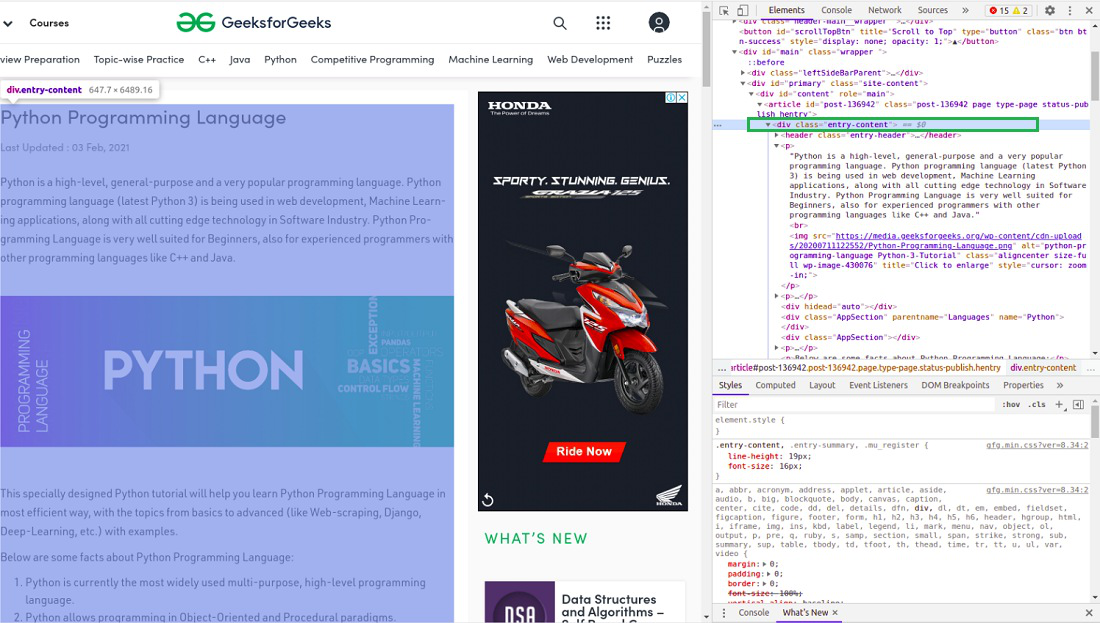

Finding Elements by class
In the above image, we can see that all the content of the page is under the div with class entry-content. We will use the find class. This class will find the given tag with the given attribute. In our case, it will find all the div having class as entry-content. We have got all the content from the site but you can see that all the images and links are also scraped. So our next task is to find only the content from the above-parsed HTML. On again inspecting the HTML of our website – 

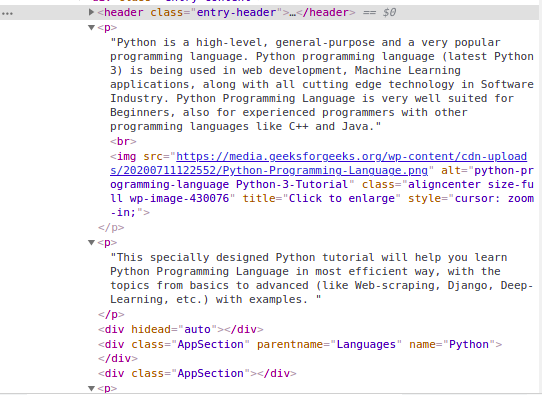

We can see that the content of the page is under the <p> tag. Now we have to find all the p tags present in this class. We can use the find_all class of the BeautifulSoup.

In [10]:
import requests
from bs4 import BeautifulSoup

# Making a GET request
req5 = requests.get('https://www.geeksforgeeks.org/python-web-scraping-tutorial/')

# Parsing the HTML
pr_html2 = BeautifulSoup(req5.content, 'html.parser')

s = pr_html2.find('div', class_='entry-content')
if s is not None:
    content = s.find_all('p')
    print(content)
else:
    print("No matching element found.")


No matching element found.


In [17]:
import requests
from bs4 import BeautifulSoup


# Making a GET request
r = requests.get('https://www.geeksforgeeks.org/python-programming-language/')

# Parsing the HTML
soup = BeautifulSoup(r.content, 'html.parser')

s = soup.find('div', class_='entry-content')
content = s.find_all('p')

print(content)


[<p></p>, <p>This Python Tutorial is very well suited for Beginners, and also for experienced programmers with other programming languages like C++ and Java. This specially designed Python tutorial will help you learn Python Programming Language in the most efficient way, with topics from basics to advanced (like Web-scraping, Django, Deep-Learning, etc.) with examples.</p>, <p><span id="more-136942"></span></p>, <p><img alt="Python Tutorial" class="alignnone size-full wp-image-973034" height="470" sizes="(max-width: 1000px) 100vw, 1000px" src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/20230305181456/Python4.png" srcset="https://media.geeksforgeeks.org/wp-content/cdn-uploads/20230305181456/Python4.png 1000w, https://media.geeksforgeeks.org/wp-content/cdn-uploads/20230305181456/Python4-300x141.png 300w, https://media.geeksforgeeks.org/wp-content/cdn-uploads/20230305181456/Python4-768x361.png 768w, https://media.geeksforgeeks.org/wp-content/cdn-uploads/20230305181456/Python4

# Finding Elements by ID
 

In the above example, we have found the elements by the class name but let’s see how to find elements by id. Now for this task let’s scrape the content of the leftbar of the page. The first step is to inspect the page and see the leftbar falls under which tag.

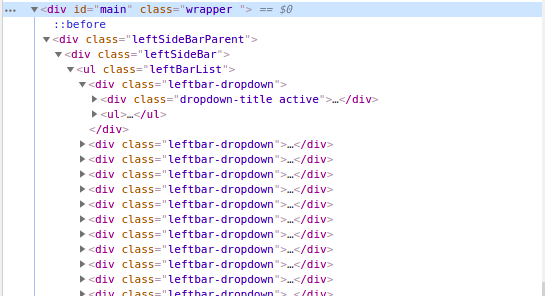

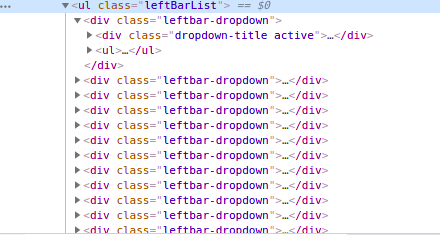

In [24]:
import requests
from bs4 import BeautifulSoup


# Making a GET request
r = requests.get('https://www.geeksforgeeks.org/python-programming-language/')

# Parsing the HTML
soup = BeautifulSoup(r.content, 'html.parser')

# Finding by id
s = soup.find('div', id= 'main')

# Getting the leftbar
leftbar = s.find('ul', class_='leftBarList')

# All the li under the above ul
content = leftbar.find_all('li')

print(content)


[<li style="background-color:#f0f3f5!important"><a href="https://write.geeksforgeeks.org/posts-new?interview-experience&amp;ref=GLBIE" style="color:#000!important">Write an Interview Experience</a></li>, <li style="background-color:#f0f3f5!important"><a href="https://write.geeksforgeeks.org/posts-new?cid=22ae3354-15b6-4dd4-a5b4-5c7a105b8a8f" style="color:#000!important">Share Your Work Experience</a></li>, <li class="currentpage"><a href="https://www.geeksforgeeks.org/python-programming-language/?ref=lbp">Python Tutorial</a></li>, <li><a href="https://www.geeksforgeeks.org/introduction-to-python/?ref=lbp">Introduction To PYTHON</a></li>, <li><a href="https://www.geeksforgeeks.org/python-language-advantages-applications/?ref=lbp">Python Language advantages and applications</a></li>, <li><a href="https://www.geeksforgeeks.org/download-and-install-python-3-latest-version/?ref=lbp">Download and Install Python 3 Latest Version</a></li>, <li><a href="https://www.geeksforgeeks.org/python-3-ba

# Extracting Text from the tags
 

In the above examples, you must have seen that while scraping the data the tags also get scraped but what if we want only the text without any tags. Don’t worry we will discuss the same in this section. We will be using the text property. It only prints the text from the tag. We will be using the above example and will remove all the tags from them

In [27]:
import requests
from bs4 import BeautifulSoup

# Making the request
r = requests.get('https://www.geeksforgeeks.org/python-programming-language/')

# Parsing the HTML
soup = BeautifulSoup(r.content, 'html.parser')

s = soup.find('div', class_='entry-content')

lines = s.find_all('p')

for line in lines:
    print(line.text)



This Python Tutorial is very well suited for Beginners, and also for experienced programmers with other programming languages like C++ and Java. This specially designed Python tutorial will help you learn Python Programming Language in the most efficient way, with topics from basics to advanced (like Web-scraping, Django, Deep-Learning, etc.) with examples.


Python is a high-level, general-purpose, and very popular programming language. Python programming language (latest Python 3) is being used in web development, Machine Learning applications, along with all cutting-edge technology in Software Industry.
Python language is being used by almost all tech-giant companies like – Google, Amazon, Facebook, Instagram, Dropbox, Uber… etc.
The biggest strength of Python is huge collection of standard library which can be used for the following:
Python is currently the most widely used multi-purpose, high-level programming language, which allows programming in Object-Oriented and Procedural p

# Removing the tags from the content of the leftbar

In [31]:
"""
import requests
from bs4 import BeautifulSoup

# Making the request
r = requests.get('https://www.geeksforgeeks.org/python-programming-language/')

# Parsing the HTML
soup = BeautifulSoup(r.content, 'html.parser')

s = soup.find('div', id='main')

leftbar = s.find('ul', class_='LeftBarList')

lines = leftbar.find_all('li')

for line in lines:
    print(line.text)
"""

import requests
from bs4 import BeautifulSoup


# Making a GET request
r = requests.get('https://www.geeksforgeeks.org/python-programming-language/')

# Parsing the HTML
soup = BeautifulSoup(r.content, 'html.parser')

# Finding by id
s = soup.find('div', id= 'main')

# Getting the leftbar
leftbar = s.find('ul', class_='leftBarList')

# All the li under the above ul
lines = leftbar.find_all('li')

for line in lines:
	print(line.text)


Write an Interview Experience
Share Your Work Experience
Python Tutorial
Introduction To PYTHON
Python Language advantages and applications
Download and Install Python 3 Latest Version
Python 3 basics
Python Keywords
Namespaces and Scope in Python
Statement, Indentation and Comment in Python
How to assign values to variables in Python and other languages
Taking input in Python
Taking input from console in Python
Taking multiple inputs from user in Python
Python | Output using print() function
How to print without newline in Python?
Python end parameter in print()
Python | sep parameter in print()
Python | Output Formatting
Python Operators
Ternary Operator in Python
Division Operators in Python
Operator Overloading in Python
Any All in Python
Operator Functions in Python | Set 1
Operator Functions in Python | Set 2
Difference between == and is operator in Python
Python Membership and Identity Operators
Python | Set 3 (Strings, Lists, Tuples, Iterations)
Python String
Python Lists
Pytho

# Extracting Links
 

Till now we have seen how to extract text, let’s now see how to extract the links from the page.

In [32]:
import requests
from bs4 import BeautifulSoup


# Making a GET request
r = requests.get('https://www.geeksforgeeks.org/python-programming-language/')

# Parsing the HTML
soup = BeautifulSoup(r.content, 'html.parser')

# find all the anchor tags with "href"
for link in soup.find_all('a'):
	print(link.get('href'))


#main
https://www.geeksforgeeks.org/
https://practice.geeksforgeeks.org/courses/android-dev-live?utm_source=geeksforgeeks&utm_medium=main_header&utm_campaign=courses
https://practice.geeksforgeeks.org/courses/data-science-live?utm_source=geeksforgeeks&utm_medium=main_header&utm_campaign=courses
https://practice.geeksforgeeks.org/courses/dsa-interview-preparation-classroom?utm_source=geeksforgeeks&utm_medium=main_header&utm_campaign=courses
https://practice.geeksforgeeks.org/courses/geeks-classes-live?utm_source=geeksforgeeks&utm_medium=main_header&utm_campaign=courses
https://practice.geeksforgeeks.org/courses/dsa-self-paced?utm_source=geeksforgeeks&utm_medium=main_header&utm_campaign=courses
https://practice.geeksforgeeks.org/courses/Data-Structures-With-Python?utm_source=geeksforgeeks&utm_medium=main_header&utm_campaign=courses
https://practice.geeksforgeeks.org/courses/data-structures-and-algorithms-in-javascript?utm_source=geeksforgeeks&utm_medium=main_header&utm_campaign=courses
h

# Extracting Image Information
 

On again inspecting the page, we can see that images lie inside the img tag and the link of that image is inside the src attribute. See  the below image – 

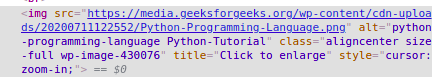

In [33]:
import requests
from bs4 import BeautifulSoup


# Making a GET request
r = requests.get('https://www.geeksforgeeks.org/python-programming-language/')

# Parsing the HTML
soup = BeautifulSoup(r.content, 'html.parser')

images_list = []

images = soup.select('img')
for image in images:
	src = image.get('src')
	alt = image.get('alt')
	images_list.append({"src": src, "alt": alt})
	
for image in images_list:
	print(image)


{'src': 'https://media.geeksforgeeks.org/gfg-gg-logo.svg', 'alt': 'geeksforgeeks'}
{'src': 'https://media.geeksforgeeks.org/wp-content/cdn-uploads/20230305181456/Python4.png', 'alt': 'Python Tutorial'}
{'src': 'https://media.geeksforgeeks.org/img-practice/banner/Data-Structures-With-Python-thumbnail.webp?v=19527', 'alt': 'course-img'}
{'src': 'https://media.geeksforgeeks.org/img-practice/banner/Python-Foundation-thumbnail.webp?v=19527', 'alt': 'course-img'}
{'src': 'https://media.geeksforgeeks.org/img-practice/banner/py-dev-django-thumbnail.webp?v=19527', 'alt': 'course-img'}
{'src': 'https://media.geeksforgeeks.org/auth-dashboard-uploads/gfgFooterLogo.png', 'alt': 'geeksforgeeks-footer-logo'}
{'src': 'https://media.geeksforgeeks.org/auth-dashboard-uploads/googleplay.png', 'alt': 'GFG App on Play Store'}
{'src': 'https://media.geeksforgeeks.org/auth-dashboard-uploads/appstore.png', 'alt': 'GFG App on App Store'}
{'src': '', 'alt': 'Lightbox'}


# Scraping multiple Pages
 

Now, there may arise various instances where you may want to get data from multiple pages from the same website or multiple different URLs as well, and manually writing code for each webpage is a time-consuming and tedious task. Plus, it defines all basic principles of automation. Duh!  

 

To solve this exact problem, we will see two main techniques that will help us extract data from multiple webpages:

 

The same website
Different website URLs

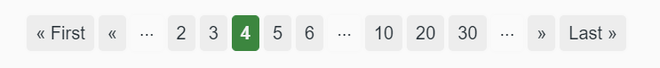

Most websites have pages labeled from 1 to N. This makes it really simple for us to loop through these pages and extract data from them as these pages have similar structures. For example:

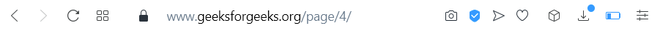

Here, we can see the page details at the end of the URL. Using this information we can easily create a for loop iterating over as many pages as we want (by putting page/(i)/ in the URL string and iterating “i” till N) and scrape all the useful data from them. The following code will give you more clarity over how to scrape data by using a For Loop in Python.

In [36]:
import requests
from bs4 import BeautifulSoup as bs

URL = 'https://www.geeksforgeeks.org/page/1/'

req = requests.get(URL)
soup = bs(req.text, 'html.parser')

titles = soup.find_all('div', attrs={'class': 'head'})

if len(titles) >= 5:
    print(titles[4].text)
else:
    print("Not enough elements in 'titles' list.")


Not enough elements in 'titles' list.


In [38]:
import requests
from bs4 import BeautifulSoup as bs

URL = 'https://www.geeksforgeeks.org/page/'

for page in range(1, 10):
    req = requests.get(URL + str(page) + '/')
    soup = bs(req.text, 'html.parser')

    titles = soup.find_all('div', attrs={'class', 'head'})

    if len(titles) > 4:
        for i in range(4, min(19, len(titles))):
            if page > 1:
                print(f"{(i - 3) + (page - 1) * 15}" + titles[i].text)
            else:
                print(f"{i - 3}" + titles[i].text)
    else:
        print(f"Not enough elements in 'titles' list on page {page}.")


Not enough elements in 'titles' list on page 1.
16Types of Network Medium: Wired & Wireless Networking
17Determine if Two Trees are Identical or Not
18#2 Tips & Tricks for Competitive Programming
19Check if given Binary Tree is Height Balanced or Not
20Old Tax Regime vs New Tax Regime. Which One You Should Choose?
21Number of leaf nodes
22Top 10 Mobile App Development Frameworks in 2023
23How to Delete Your Instagram Account
2410 Best Game Hacking Apps For Android
2510 Best Linux Terminal Emulators
26How To Convert YouTube to MP3
2710 Best ChatGPT Alternatives in 2023 (Free and Paid)
28Kalinga Institute of Industrial Technology (KIIT) Admission Experience
29Adjustment of Bad Debts in Final Accounts (Financial Statements)
30Adjustment of Appreciation in Final Accounts (Financial Statements)
31Types of Network Medium: Wired & Wireless Networking
32Determine if Two Trees are Identical or Not
33#2 Tips & Tricks for Competitive Programming
34Check if given Binary Tree is Height Balanced or 

Example 2: Looping through a list of different URLs
The above technique is absolutely wonderful, but what if you need to scrape different pages, and you don’t know their page numbers? You’ll need to scrape those different URLs one by one and manually code a script for every such webpage.

Instead, you could just make a list of these URLs and loop through them. By simply iterating the items in the list i.e. the URLs, we will be able to extract the titles of those pages without having to write code for each page. Here’s an example code of how you can do it.

In [40]:
import requests
from bs4 import BeautifulSoup as bs

URLs = ['https://www.geeksforgeeks.org', 'https://www.geeksforgeeks.org/page/10/']

for url in URLs:
    req = requests.get(url)
    soup = bs(req.text, 'html.parser')

    titles = soup.find_all('div', attrs={'class': 'head'})

    if len(titles) > 4:
        for i in range(4, min(19, len(titles))):
            if url != URLs[0]:
                print(f"{(i - 3) + (URLs.index(url)) * 15}" + titles[i].text)
            else:
                print(f"{i - 3}" + titles[i].text)
    else:
        print(f"Not enough elements in 'titles' list for URL: {url}")


Not enough elements in 'titles' list for URL: https://www.geeksforgeeks.org
16Types of Network Medium: Wired & Wireless Networking
17Determine if Two Trees are Identical or Not
18#2 Tips & Tricks for Competitive Programming
19Check if given Binary Tree is Height Balanced or Not
20Old Tax Regime vs New Tax Regime. Which One You Should Choose?
21Number of leaf nodes
22How to Create Your Own ChatGPT Plugin?
23Quantity Theory of Money: Transactions Approach (Fisher’s Version)
24Google Cloud Announces 9 AI-Focused Courses (FREE)
25Canons of Taxation
26University School of Automation and Robotics Campus Experience
27Arithmetic Mean: Meaning, Example, Types, Merits, and Demerits
28TCS Ninja Interview Experience
29Capgemini Interview Experience for Analyst (On-Campus)
30Indian Institute of Information Technology (IIT Nagpur) Admission Experience 2021


# Saving Data to CSV
First we will create a list of dictionaries with the key value pairs that we want to add in the CSV file. Then we will use the csv module to write the output in the CSV file. See the below example for better understanding.

In [42]:
import requests
from bs4 import BeautifulSoup as bs
import csv

URL = 'https://www.geeksforgeeks.org/page/'

soup = bs(req.text, 'html.parser')

titles = soup.find_all('div', attrs={'class', 'head'})
titles_list = []

count = 1
for title in titles:
	d = {}
	d['Title Number'] = f'Title {count}'
	d['Title Name'] = title.text
	count += 1
	titles_list.append(d)

filename = 'titles.csv'
with open(filename, 'w', newline='') as f:
	w = csv.DictWriter(f,['Title Number','Title Name'])
	w.writeheader()
	
	w.writerows(titles_list)
